## 2.2　正味現在価値と内部収益率

t年後にw(t)円受け取る機会が1回だけある場合を2.1では考えたが、現実の投資において将来の複数の時点にわたって受取や支払いが発生する。

これは不動産による現在価値と将来価値の変化や為替と株の値動きなど様々な例が挙げられる。
#### 投資を伴う現時点から将来にわたる資金の出入りの系列を一般的にキャッシュフローと呼ぶ。

コード2.2　pyfin._npv_irr.py

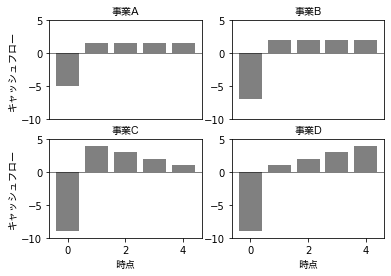

<ipython-input-1-1633804880a2>:56: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  Positive = np.asscalar(Real[Real > 0.0])


In [1]:
# -*- coding: utf-8 -*-
#%% NumPyの読み込み
import numpy as np
#   NumPyのPolynomialモジュールの読み込み
import numpy.polynomial.polynomial as pol
#   MatplotlibのPyplotモジュールの読み込み
import matplotlib.pyplot as plt
#   日本語フォントの設定
from matplotlib.font_manager import FontProperties
import sys
if sys.platform.startswith('win'):
    FontPath = 'C:\\Windows\\Fonts\\meiryo.ttc'
elif sys.platform.startswith('darwin'):
    FontPath = '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'
elif sys.platform.startswith('linux'):
    FontPath = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
jpfont = FontProperties(fname=FontPath)
#%% キャッシュフローのグラフ
Periods = np.linspace(0, 4, 5)
V_CF = np.array([[-5.0, 1.5, 1.5, 1.5, 1.5],
                 [-7.0, 2.0, 2.0, 2.0, 2.0],
                 [-9.0, 4.0, 3.0, 2.0, 1.0],
                 [-9.0, 1.0, 2.0, 3.0, 4.0]])
V_Title = [u'事業A', u'事業B', u'事業C', u'事業D']
fig1 = plt.figure(1, facecolor='w')
for fig_num in range(4):
    plt.subplot(2, 2, fig_num + 1)
    plt.bar(Periods, V_CF[fig_num, :], color=(0.5, 0.5, 0.5))
    plt.title(V_Title[fig_num], fontproperties=jpfont)
    plt.axhline(color='k', linewidth=0.5)
    plt.ylim(-10, 5)
    if fig_num == 2 or fig_num == 3:
        plt.xlabel(u'時点', fontproperties=jpfont)
    if fig_num == 0 or fig_num == 2:
        plt.ylabel(u'キャッシュフロー', fontproperties=jpfont)
    if fig_num == 0 or fig_num == 1:
        plt.xticks([])
plt.show()
#%% 正味現在価値の計算
def NPV(r, CF):
    #       r: 割引率 (%)
    #      CF: キャッシュフロー
    #  Output: 正味現在価値
    x = 1.0 / (1.0 + 0.01 * r)
    return pol.polyval(x, CF)
r = 5 # 割引率はパーセント単位
V_NPV = np.zeros(4)
for cf_num in range(4):
    V_NPV[cf_num] = NPV(r, V_CF[cf_num, :])
#%% 内部収益率の計算
def IRR(CF):
    #      CF: キャッシュフロー
    #  Output: 内部収益率 (%)
    Roots = pol.polyroots(CF)
    Real = np.real(Roots[np.isreal(Roots)])
    Positive = np.asscalar(Real[Real > 0.0])
    return (1.0 / Positive - 1.0) * 100
V_IRR = np.zeros(4)
for cf_num in range(4):
    V_IRR[cf_num] = IRR(V_CF[cf_num, :])

plt.subplot() 複数の図のためにウィンドウを分割する関数

plt.bar() 棒グラフを作成する関数

plt.axhline() 横軸と平行する横線を描く関数

plt.ylim() 横軸の下限と上限を設定する関数

plt.xticks() 横軸のメモリを設定する関数

In [2]:
# 正味現在価値の計算
def NPV(r,CF):
    #        r:割引率
    #       CF:キャッシュフロー
    #   Output:正味現在価値
    x = 1.0/(1.0 + 0.01 * r)
    return pol.polyval(x,CF)

r = 5
V_NPV = np.zeros(4)
for cf_num in range(4):
    V_NPV[cf_num] = NPV(r, V_CF[cf_num,:])

In [3]:
# 内部収益率の計算
def IRR(CF):
    #     CF:キャッシュフロー
    # Output:内部収益率(％)
    Roots = pol.polyroots(CF)
    Real = np.real(Roots[np.isreal(Roots)])
    Positive = np.asscalar(Real[Real > 0.0])
    return (1.0 / Positive - 1.0) * 100
V_IRR = np.zeros(4)
for cf_num in range(4):
    V_IRR[cf_num] = IRR(V_CF[cf_num,:])

<ipython-input-3-32382f431808>:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  Positive = np.asscalar(Real[Real > 0.0])


In [4]:
V_NPV

array([ 0.31892576,  0.09190101,  0.08098992, -0.3512374 ])

In [5]:
V_IRR

array([7.7138473 , 5.56378464, 5.48356897, 3.59611621])

正味現在価値あるいは純現在価値(Net Present Value, NPV)は「投資手段が生み出すキャッシュフローの現在価値から初期投資額を引いた金額」として定義される

内部収益率(Internal Rate of Return,IRR)は投資の収益の現在価値の総和が初期投資の費用と同等になる割引率の水準

見方を変えるとIRRは投資手段と同等の総収益を生み出すような銀行預金の利率である

したがってIRRをあたかも投資手段の「利率」のようなものとして投資手段の選択基準として使うことができる